In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image

from tensorflow import keras
from sklearn.model_selection import train_test_split


In [168]:
data_train = pd.read_csv('data/emnist-balanced-train.csv')
data_test = pd.read_csv('data/emnist-balanced-test.csv')
mapp = pd.read_csv("data/emnist-balanced-mapping.txt", delimiter = ' ', \
                   index_col=0, header=None).squeeze("columns")
data_train.head()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
X_train = data_train.iloc[:,1:]
y_train = data_train.iloc[:,0]

X_test = data_test.iloc[:,1:]
y_test = data_test.iloc[:,0]

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

X_train_scaled = X_train / 255.0
X_train_scaled = X_train_scaled.astype('float32')
X_test_scaled = X_test / 255.0
X_test_scaled = X_test_scaled.astype('float32')

X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0],28,28,1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0],28,28,1)

print(X_train_scaled.shape, y_train.shape,X_test_scaled.shape,y_test.shape)



(112799, 28, 28, 1) (112799,) (18799, 28, 28, 1) (18799,)


In [170]:
number_of_classes = 48

y_train = tf.keras.utils.to_categorical(y_train, number_of_classes)
y_test = tf.keras.utils.to_categorical(y_test, number_of_classes)

X_train_scaled,val_scaled,y_train,val_target = train_test_split(X_train_scaled,y_train,train_size=0.4, random_state=42)


In [171]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 512)               2769408   
_________________________________________________________________
dense_58 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_59 (Dense)             (None, 48)                6192      
Total params: 2,841,584
Trainable params: 2,841,584
Non-trainable params: 0
___________________________________________

In [179]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)
checkpoint = ModelCheckpoint('best-parameters.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')

history = model.fit(X_train_scaled,y_train,epochs=30,batch_size=256,verbose=1,validation_data=(val_scaled,val_target),callbacks=[checkpoint,early_stopping,RLP])

Epoch 1/30
177/177 [==============================] - 7s 38ms/step - loss: 1.2187 - accuracy: 0.6765 - val_loss: 0.7586 - val_accuracy: 0.7768

Epoch 00001: val_accuracy improved from -inf to 0.77682, saving model to best-parameters.h5
Epoch 2/30
177/177 [==============================] - 7s 38ms/step - loss: 0.9403 - accuracy: 0.7293 - val_loss: 0.6963 - val_accuracy: 0.7979

Epoch 00002: val_accuracy improved from 0.77682 to 0.79792, saving model to best-parameters.h5
Epoch 3/30
177/177 [==============================] - 7s 38ms/step - loss: 0.8394 - accuracy: 0.7531 - val_loss: 0.6640 - val_accuracy: 0.8018

Epoch 00003: val_accuracy improved from 0.79792 to 0.80176, saving model to best-parameters.h5
Epoch 4/30
177/177 [==============================] - 7s 37ms/step - loss: 0.7725 - accuracy: 0.7711 - val_loss: 0.6503 - val_accuracy: 0.8035

Epoch 00004: val_accuracy improved from 0.80176 to 0.80350, saving model to best-parameters.h5
Epoch 5/30
177/177 [===========================

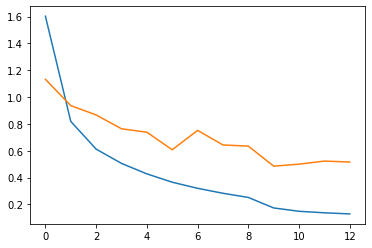

In [174]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


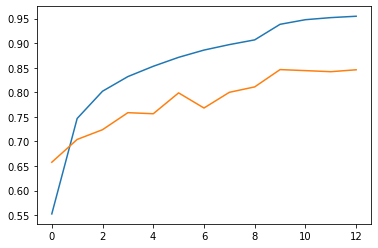

In [175]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])